1. 
strategies in SimpleImputer : median, mean, most_frequent


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


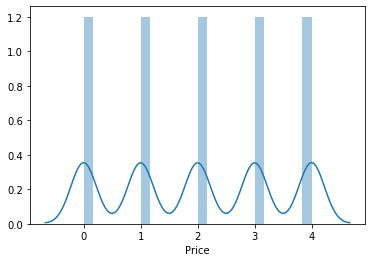

In [413]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv("melb_data.csv")
df = df.drop(['Address'], axis=1)
# 'Car', and 'BuildingArea' can be imputed by mean.
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Car', 'BuildingArea']] = mean_imputer.fit_transform(df[['Car', 'BuildingArea']])

# 'YearBuilt', and 'CouncilArea' can not be imputed by mean simply. 
# Because it doesn't make any sense.

most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['YearBuilt']] = most_frequent_imputer.fit_transform(df[['YearBuilt']])


most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['CouncilArea']] = most_frequent_imputer.fit_transform(df[['CouncilArea']])


# I don't like the way dividing the samples equally into 5 categories/classes. 
# Because I think it may cause the problem that one price is in two labels. 
#  
# label price to 5 classes. 
# Dividing into 5 classes is not good either. 
# Because it will cause data unbalance. 
# 
# Finally, choose the dividing the samples equally into 5 categories/classes.
# 
CLASSES = 5

df = df.sort_values(by=['Price'])
max_number = len(df.Price)
class_width = max_number // CLASSES

for i in range(CLASSES):
    df.Price.iloc[i*class_width:(i+1)*class_width] = i

# df.Price.describe()
# df['Price'] = pd.cut(df['Price'], bins=CLASSES, labels=False)

import seaborn as sns
sns.distplot(df.Price)

# What is the meaning of the following prompt?

$ Price: 

top value: 4

high value: 3

medium value: 2

low value: 1 

bottom value: 0


2. Classic Encoders: 

OneHot — one column for each value to compare vs. all other values. Nominal, ordinal.

Label - 

=========================================================

Suburb : OneHotEncoder / LabelEncoder

Address :  useless.

Rooms :

Type : OneHotEncoder / LabelEncoder

Price : label 5 classes.  This is y.

Method : OneHotEncoder / LabelEncoder

SellerG	: OneHotEncoder / LabelEncoder

Date : OneHotEncoder / LabelEncoder

Distance

Postcode     

Bedroom2

Bathroom

Car	

Landsize

BuildingArea 

YearBuilt	

CouncilArea	: OneHotEncoder / LabelEncoder

Lattitude	

Longtitude	

Regionname : OneHotEncodee / LabelEncoder

Propertycount


In [414]:
# OneHotEncoder for nominal data
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

ohc_data = one_hot.fit_transform(df[['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']])

data = np.array(df[['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']])

x = np.concatenate((ohc_data, data), axis=1)
y = np.array(df.Price)

In [405]:
# LabelEncoder for nominal data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
headers_to_be_label = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
for header in headers_to_be_label:
    df[header] = le.fit_transform(df[[header]])

y = np.array(df.Price)
x = np.array(df.drop(['Price'], axis=1))

# prompt?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [411]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# k is from 5 to 10
k_knn = range(5, 11)
accuracy_knn = dict()
TEST_SIZE = 0.34
SPLITTING_TIMES = 10

for k in k_knn:
    accuracy = []
    for j in range(SPLITTING_TIMES):
        # random_state is a seed
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=k+j)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
    # Store the average accuracy. 
    accuracy_knn[k] = sum(accuracy)/len(accuracy)
    
print(accuracy_knn)


{5: 0.5398657427457774, 6: 0.5338241663057601, 7: 0.5395192724122997, 8: 0.5351234300563014, 9: 0.5340840190558684, 10: 0.5311823300129926}


In [415]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
TEST_SIZE = 0.34
SPLITTING_TIMES = 10

accuracy = []
for j in range(SPLITTING_TIMES):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=j)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
average_accuracy = sum(accuracy) / len(accuracy)
    
print(average_accuracy)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

0.6048505846686878
